In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_weather=pd.read_html("https://www.infoplease.com/math-science/weather/climate-of-100-selected-us-cities",header=[1])[0]
df_weather = df_weather[(df_weather["City"]=="Austin, Texas")|  (df_weather["City"]=="Seattle-Tacoma, Wash.") | (df_weather["City"]=="Chicago, Ill.")]
df_weather

,City,Jan.,April,July,Oct.,Average annual,Average annual.1,Averageannual(in.)3,Numberof yearsobserved4
7,"Austin, Texas",50.2,68.3,84.2,70.6,33.65,85,0.9,62 / 58
24,"Chicago, Ill.",22.0,47.8,73.3,52.1,36.27,125,38.0,45 / 44
88,"Seattle-Tacoma, Wash.",40.9,50.2,65.3,52.7,37.07,155,11.4,59 / 52


In [3]:
df_weather.drop(["City","Numberof yearsobserved4"], axis = 1, inplace = True) 
df_weather

,Jan.,April,July,Oct.,Average annual,Average annual.1,Averageannual(in.)3
7,50.2,68.3,84.2,70.6,33.65,85,0.9
24,22.0,47.8,73.3,52.1,36.27,125,38.0
88,40.9,50.2,65.3,52.7,37.07,155,11.4


In [4]:
data_scaled = normalize(df_weather)
data_scaled = pd.DataFrame(data_scaled, columns=df_weather.columns)
data_scaled.head()

,Jan.,April,July,Oct.,Average annual,Average annual.1,Averageannual(in.)3
0,0.302075,0.410991,0.506668,0.424831,0.202487,0.511482,0.005416
1,0.128656,0.279534,0.428658,0.304680,0.212107,0.730998,0.222224
2,0.213312,0.261816,0.340569,0.274855,0.193337,0.808396,0.059456


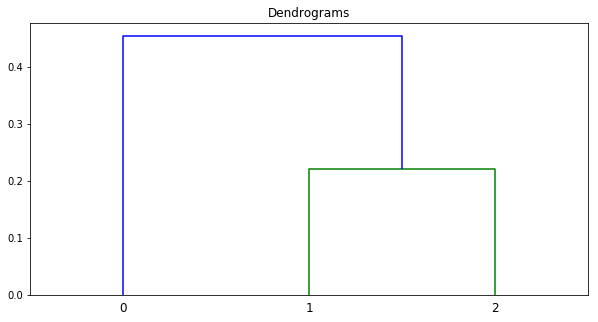

In [5]:
plt.figure(figsize=(10, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

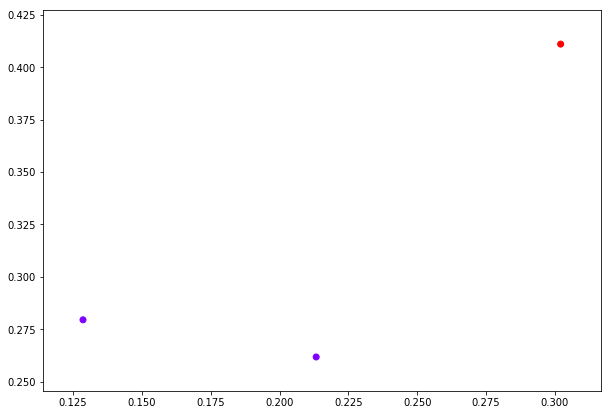

In [6]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
#plt.figure(figsize=(10, 7))  
#plt.scatter(data_scaled['Cost of Living Plus Rent Index'], data_scaled['Restaurant Price Index'], c=cluster.labels_) 
plt.figure(figsize=(10, 7))
df =data_scaled.to_numpy()
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')